# **Deep Learning Practical Assignment Report: Chinese Character  MNIST Classification**

**1. Introduction and Background**

   **Introduction:** The goal of this assignment is to develop a machine learning model that aim to classify Chinese digits or numbers (0 to 9, 10, 100, 1000, 10000 or 10K, 100 Millions) from images using a dataset of handwritten characters.The dataset consists of 15 classes, each corresponding to one Chinese digit. We aim to apply deep learning techniques, particularly a ***fully connected feedforward neural network (FNN)***, to solve this image classification problem.

The key steps in the process include:

*   **Data Preprocessing:** Clean and format the dataset, resize images, and normalize them for neural network input.
*   **Model Selection:** We start with a simple fully connected FNN and later consider possible improvements through fine-tuning and regularization.
*   **Training and Evaluation:** The model is trained using training data, evaluated on test data, and fine-tuned for better performance.
*   **Prediction:** Finally, we demonstrate how the trained model can make predictions on unseen data.


**Conclusion:** The process of training a deep neural network for image classification involves iterative refinement. We aim to maximize model accuracy by experimenting with different configurations and regularization techniques. While FFNNs are effective for simpler tasks, further improvements may be possible through more advanced architectures like Convolutional Neural Networks (CNNs), especially for image-related tasks.

In [ ]:
#Loading of Chinese character number image & metafile
import os
# Dataset extraction and loading
if not os.path.exists('data/extracted_data/Chinese_Num_Mnist'):
    # Remove any existing files with the same name
    !rm -rf hand_sign_datasets_csv.7z
    # Download the dataset
    !wget "https://github.com/lesterchia1/chinese_num_MNIST/raw/main/chinese_num_mnist_datasets.7z"
    # Install p7zip if not already installed
    !apt-get install -y p7zip-full
    # Extract the dataset
    !7z x chinese_num_mnist_datasets.7z -odata/extracted_data
else:
    print("Directory 'chinese_num_mnist_datasets' already exists.")

--2024-12-01 05:36:43--  https://github.com/lesterchia1/chinese_num_MNIST/raw/main/chinese_num_mnist_datasets.7z
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lesterchia1/chinese_num_MNIST/main/chinese_num_mnist_datasets.7z [following]
--2024-12-01 05:36:43--  https://raw.githubusercontent.com/lesterchia1/chinese_num_MNIST/main/chinese_num_mnist_datasets.7z
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2961544 (2.8M) [application/octet-stream]
Saving to: ‘chinese_num_mnist_datasets.7z’

chinese_num_mnist_d 100%[===================>]   2.82M  --.-KB/s    in 0.03s   

2024-12-01 05:36:43 (105 


The dataset contains a total of 15,000 Chinese number images, with 1,000 images for each number: 0 to 9, 10, 100, 1,000, 10,000, and 100 million.

In [ ]:
import pandas as pd
data=pd.read_csv("data/extracted_data/Chinese_Num_Mnist/chinese_mnist.csv")
print(f"frequence of each character:")
data.character.value_counts()

frequence of each character:


,count
character,
九,1000
十,1000
百,1000
千,1000
万,1000
亿,1000
零,1000
一,1000
二,1000


**Display Chinese Character number image from 0 to  9, 10, 100, 1000, 10 thousands and 100 millions. Total 15 Characters.**

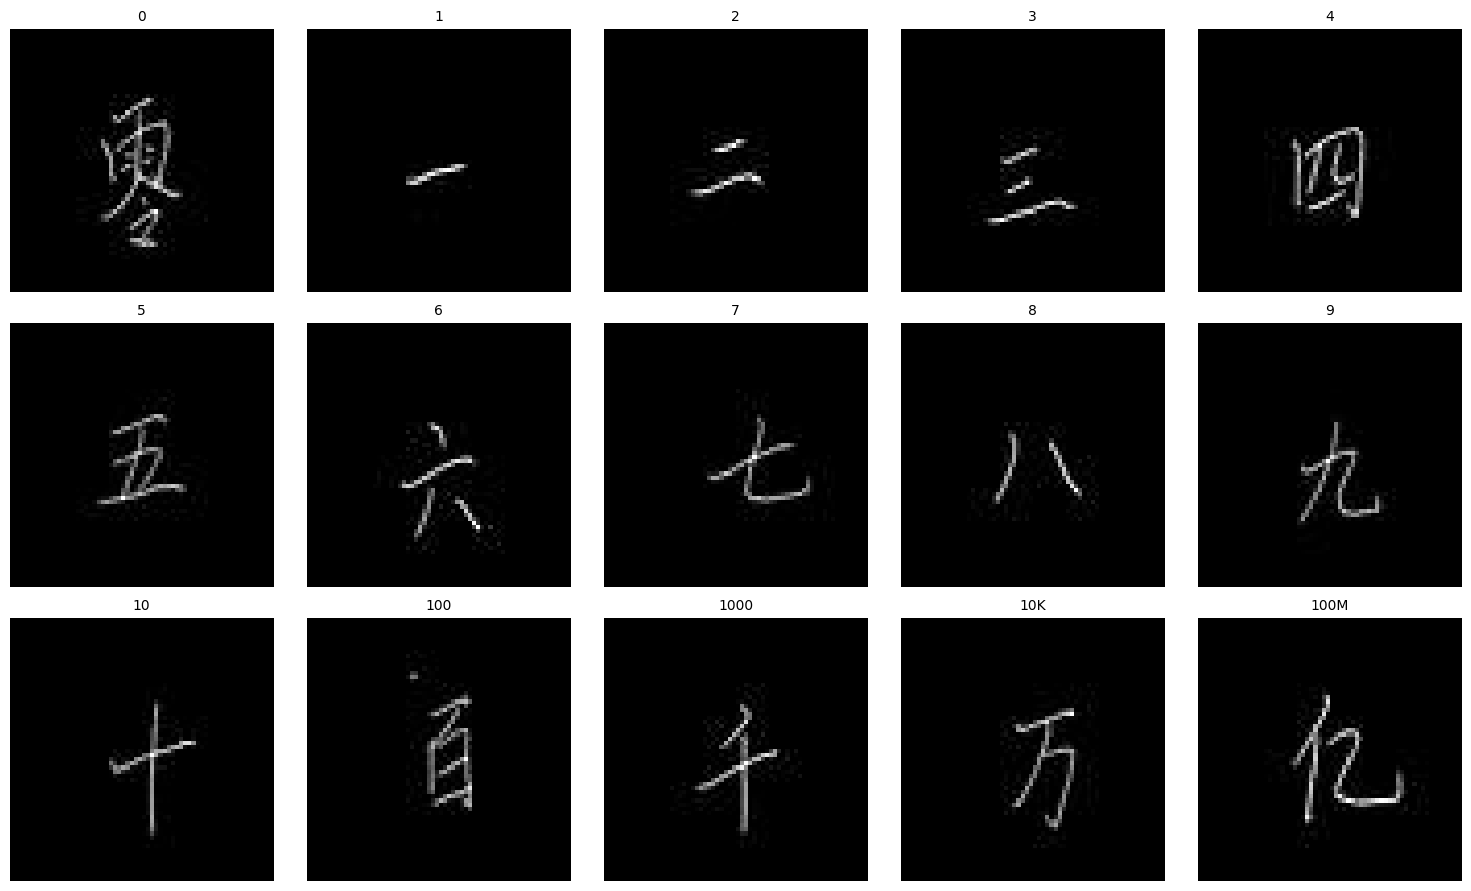

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# Define the mapping of numbers to image names
number_to_image = {
    '0': 'input_1_10_1',
    '1': 'input_1_10_2',
    '2': 'input_1_10_3',
    '3': 'input_1_10_4',
    '4': 'input_1_10_5',
    '5': 'input_1_10_6',
    '6': 'input_1_10_7',
    '7': 'input_1_10_8',
    '8': 'input_1_10_9',
    '9': 'input_1_10_10',
    '10': 'input_1_10_11',
    '100': 'input_1_10_12',
    '1000': 'input_1_10_13',
    '10K': 'input_1_10_14',
    '100M': 'input_1_10_15'
}

# Define the folder where the images are located
image_folder = 'data/extracted_data/Chinese_Num_Mnist/Dataset/'

# Function to display the image based on the number
def display_chinese_number_image(ax, number):
    # Get the image name based on the number
    image_name = number_to_image.get(str(number), None)
    if image_name:
        # Load the image
        image_path = os.path.join(image_folder, image_name + '.jpg')  # Assuming images are in .jpg format
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
        if img is not None:
            ax.imshow(img, cmap='gray')
            ax.set_title(f'{number}', fontsize=10)
            ax.axis('off')  # Hide axes
        else:
            ax.text(0.5, 0.5, f"Image\n{number}\nNot Found", horizontalalignment='center', verticalalignment='center', fontsize=12, color='red')
            ax.axis('off')  # Hide axes
    else:
        ax.text(0.5, 0.5, f"No image\nmapping\nfound", horizontalalignment='center', verticalalignment='center', fontsize=12, color='red')
        ax.axis('off')  # Hide axes

# Create a figure with 3 rows and 5 columns (3x5 grid)
fig, axes = plt.subplots(3, 5, figsize=(15, 9))

# List of numbers to display
numbers = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '100', '1000', '10K', '100M']

# Iterate over the axes and numbers
for ax, number in zip(axes.flatten(), numbers):
    display_chinese_number_image(ax, number)

# Adjust layout to make sure the images and titles fit well
plt.tight_layout()
plt.show()

**2. Data Pre-processing (10%)**

Loading and Resizing Images:
The dataset is composed of images stored in .jpg format, with each image representing a number. The images are loaded, resized to 28x28 pixels, and converted to grayscale. Resizing ensures all images are uniform in size, making them suitable for input into the neural network.


```
Python copy code

def load_and_preprocess_images(data_dir, image_size=28):
    images, labels = [], []

    # Iterate through files in the dataset directory
    for idx, file in enumerate(sorted(os.listdir(data_dir))):
        if file.endswith('.jpg'):
            img_path = os.path.join(data_dir, file)
            try:
                # Load image, resize, and normalize
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (image_size, image_size))
                images.append(img)
                labels.append(idx % NUM_CLASSES)  # Assign labels based on file order
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
```

**Normalization:**
The pixel values of the images are normalized to the range [0, 1] by dividing by 255, which helps improve training efficiency and convergence.

```
Python copy code
#Convert to NumPy arrays and normalize
    return np.array(images, dtype="float32") / 255.0, np.array(labels)

```

**One-hot Encoding:**
The labels are one-hot encoded using the to_categorical function to convert the class labels into a binary matrix, which is required for multi-class classification.

```
Python copy code
y = to_categorical(y, NUM_CLASSES)
```

**Dataset Split:**

The dataset is split into training, validation, and test sets. The training set contains 60% of the data, while 20% is used for validation and 20% for testing. This split helps evaluate the model's performance on unseen data.

```
python
Copy code
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
```

Step 1: Clear perious variable , Import necessaries libraries and Clear any previous TensorFlow models from memory

In [ ]:
# Clear previous variables and states
%reset -f

# Import necessary libraries
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2  # OpenCV for image processing
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Clear any previous TensorFlow models from memory
tf.keras.backend.clear_session()

Step 2: Extraction compressed 15 Chinese character number image file (15000) + a metafile(CSV)from Github and loading to Google Colab or local data directory.  

Step 3: Pre-Datasets or Data Processing for training a neural network model.

This code loads and processes a dataset of Chinese number images for training a deep learning model:


**Define CONSTANTS:**
```
# Define constants
IMAGE_SIZE = 28      # Size to which images are resized (28x28).
NUM_CLASSES = 15     # Number of classes (15 for digits 0-9 and other numbers).
DATA_DIR = "data/extracted_data/Chinese_Num_Mnist/Dataset"  #Directory where the dataset is stored.
```

**Image Loading and Preprocessing:**

The function load_and_preprocess_images loads .jpg images from the specified directory, resizes them to 28x28 pixels, and normalizes pixel values to the range [0, 1].
Each image is assigned a label based on its file index.
```
# Function to load and preprocess images
def load_and_preprocess_images(data_dir, image_size=28):
    images, labels = [], []
```

Dataset Processing:
The images are stored in a NumPy array and reshaped into a 1D array (784 features per image).
The labels are one-hot encoded to represent the 15 classes.



```
# Convert to NumPy arrays and normalize
    return np.array(images, dtype="float32") / 255.0, np.array(labels)
```
```
# Reshape the images and one-hot encode labels
X = X.reshape(X.shape[0], -1)
y = to_categorical(y, NUM_CLASSES)
```

Data Splitting:

The dataset is split into 60% training, 20% validation, and 20% test sets.

```
# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
```
Splits the data into training, validation, and test sets.
60% of the data is used for training (X_train, y_train).
The remaining 40% is split into 50% validation (X_val, y_val) and 50% test sets (X_test, y_test).


In [ ]:
# Define constants
IMAGE_SIZE = 28
NUM_CLASSES = 15
DATA_DIR = "data/extracted_data/Chinese_Num_Mnist/Dataset"

# Function to load and preprocess images
def load_and_preprocess_images(data_dir, image_size=28):
    images, labels = [], []

    # Iterate through files in the dataset directory
    for idx, file in enumerate(sorted(os.listdir(data_dir))):
        if file.endswith('.jpg'):
            img_path = os.path.join(data_dir, file)
            try:
                # Load image, resize, and normalize
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (image_size, image_size))
                images.append(img)
                labels.append(idx % NUM_CLASSES)  # Assign labels based on file order
            except Exception as e:
                print(f"Error processing {img_path}: {e}")

    # Convert to NumPy arrays and normalize
    return np.array(images, dtype="float32") / 255.0, np.array(labels)

# Load dataset
print("Loading dataset...")
X, y = load_and_preprocess_images(DATA_DIR)

# Ensure the dataset is not empty
if X.shape[0] == 0:
    raise ValueError("Dataset is empty.")

# Reshape the images and one-hot encode labels
X = X.reshape(X.shape[0], -1)
y = to_categorical(y, NUM_CLASSES)

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Loading dataset...


**3. Number of Layers and Neuron Units**

The model is a fully connected feedforward neural network (FNN), consisting of the following layers:


The model is designed using a fully connected feedforward neural network. The network consists of several hidden layers with ReLU activation, followed by a softmax output layer for classification.

**Layer Structure:** The network includes three dense layers, with decreasing neuron counts. Dropout layers are added to prevent overfitting, and batch normalization is used for better convergence.



```
python
Copy code
model = Sequential([
    layers.Dense(512, activation="relu", input_shape=(IMAGE_SIZE * IMAGE_SIZE,)),
    layers.Dropout(0.4),
    layers.BatchNormalization(),
    
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.4),
    layers.BatchNormalization(),
    
    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    
    layers.Dense(NUM_CLASSES, activation="softmax")
])
```
________________________________________
**4. Regularization**

To prevent overfitting, two regularization techniques are employed:
1.	Dropout: Dropout layers are included after each hidden layer with a rate of 0.4. This randomly drops a fraction of neurons during training, forcing the model to generalize better.
2.	Batch Normalization: After each hidden layer, batch normalization is applied to stabilize learning and speed up convergence by normalizing the inputs to each layer.

```
python
Copy code
layers.Dropout(0.4),   # Dropout layer
layers.BatchNormalization() # Batch normalization layer

```
________________________________________
**5. Activation Functions**

The activation functions used in this model are:
•	ReLU (Rectified Linear Unit): This is used for the hidden layers. It is efficient for training deep networks and helps mitigate the vanishing gradient problem.

```
python
Copy code
model = Sequential([
    layers.Dense(512, activation="relu", input_shape=(IMAGE_SIZE * IMAGE_SIZE,)),
    layers.Dropout(0.4),
    layers.BatchNormalization(),
    
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.4),
    layers.BatchNormalization(),
    
    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    
    layers.Dense(NUM_CLASSES, activation="softmax")
])
```
________________________________________
**6. Optimization Algorithms**
The model uses the Adam optimizer, which is an adaptive learning rate optimization algorithm that combines the benefits of both AdaGrad and RMSProp. It is efficient and performs well in many scenarios without needing extensive hyperparameter tuning.

```
python
Copy code
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

```

________________________________________


Step 4: Run the build model (# of layes & neuron, Regularization, Activation function and Optimization Alorithms)

In [ ]:
# Build the model
model = Sequential([
    layers.Dense(512, activation="relu", input_shape=(IMAGE_SIZE * IMAGE_SIZE,)),
    layers.Dropout(0.4),
    layers.BatchNormalization(),

    layers.Dense(256, activation="relu"),
    layers.Dropout(0.4),
    layers.BatchNormalization(),

    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),

    layers.Dense(NUM_CLASSES, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Step 5: Train the model

In [ ]:
# Train the model with early stopping
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=18,
                    batch_size=120,
                    callbacks=[early_stopping])

Epoch 1/18
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8877 - loss: 0.3185 - val_accuracy: 0.8057 - val_loss: 0.6142
Epoch 2/18
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8943 - loss: 0.3018 - val_accuracy: 0.8010 - val_loss: 0.6463
Epoch 3/18
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8912 - loss: 0.2977 - val_accuracy: 0.8027 - val_loss: 0.6163
Epoch 4/18
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9011 - loss: 0.2800 - val_accuracy: 0.8113 - val_loss: 0.6094
Epoch 5/18
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9105 - loss: 0.2560 - val_accuracy: 0.8007 - val_loss: 0.6447
Epoch 6/18
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9109 - loss: 0.2470 - val_accuracy: 0.8047 - val_loss: 0.6308
Epoch 7/18
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9164 - loss: 0.2476 - val_accuracy: 0.8097 - val_loss: 0.6239
Epoch 8/18
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9179 - loss: 0.2312 - val_accuracy: 0.8070 - v

**7. Initialization of Weights (10%)**

Weights in the model are initialized using default methods in Keras (Glorot uniform initialization for dense layers). This initialization method is generally effective for neural networks, especially in the absence of extreme values in the input data, ensuring that the gradients do not vanish or explode during training.


Step 6: ** **bold text**RESULT :** Plot the result and graph

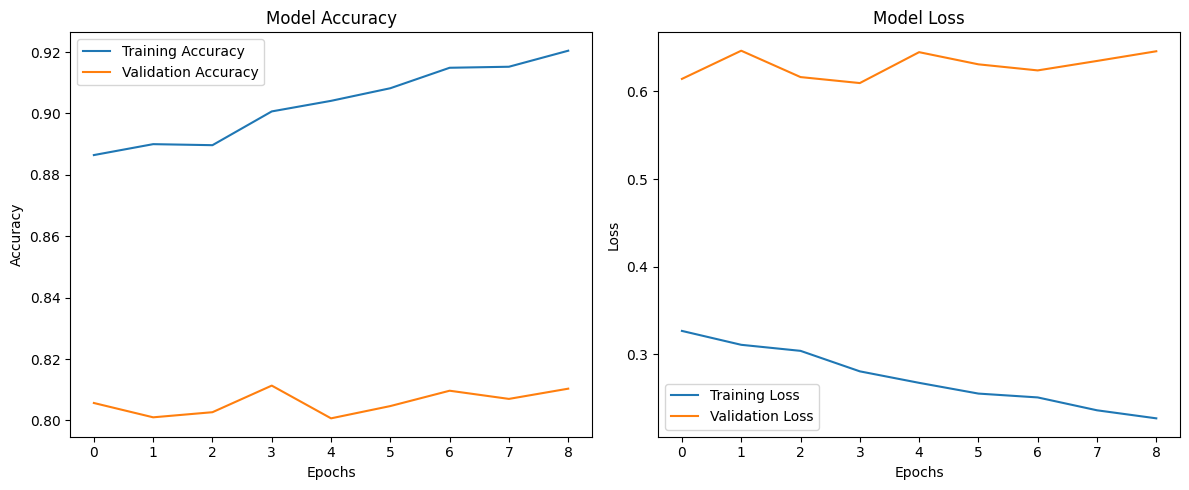

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


**8. Model Evaluation (10%)**

The model is trained using the training data and validated using the validation set. The early stopping callback ensures that training stops once the validation loss stops improving, preventing overfitting.
Metrics such as accuracy and loss are used to evaluate the performance. After training, the model is tested on the test set to determine its final accuracy.

```
python
Copy code
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
The model’s performance is plotted using the training and validation loss/accuracy curves for each epoch, allowing for visual inspection of the training process.
```

Step 7: **Model Evaluation**


This code evaluates the model on the test dataset and prints the following metrics to assess its performance on unseen data:

*   **Test Loss:** Measures how well the model predicts the test data. Lower values indicate better predictions.
*   **Test Accuracy:** Represents the percentage of correct predictions. Higher accuracy indicates better generalization to unseen data.









In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy:Higher accuracy reflects better model performance on unseen data (generalization)Higher accuracy reflects better model performance on unseen data (generalization)Higher accuracy reflects better model performance on unseen data (generalization) {test_accuracy}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7974 - loss: 0.6458
Test Loss: 0.6011373400688171, Test Accuracy:Higher accuracy reflects better model performance on unseen data (generalization)Higher accuracy reflects better model performance on unseen data (generalization)Higher accuracy reflects better model performance on unseen data (generalization) 0.8103333115577698


**9. Model Prediction (10%)**

After training the model, it can be used to make predictions on unseen data. The following code demonstrates how to predict the class of a test image:

```
python
Copy code
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

print(f"True Label: {true_classes[0]}, Predicted Label: {predicted_classes[0]}")
```
________________________________________


Step 8: **Make Prediction**

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

NameError: name 'model' is not defined

**10. Comparison Between Deep Learning Architectures (10%)**

Fully Connected Feedforward Neural Network (FNN) vs. Other Architectures

**•	Convolutional Neural Networks (CNNs):**
CNNs are designed for image-related tasks. They leverage spatial relationships in images through convolution layers, making them more effective for image classification tasks like digit recognition. FNNs, on the other hand, treat the image as a flattened vector and ignore spatial relationships, which may hinder their performance compared to CNNs.

**•	Recurrent Neural Networks (RNNs):**
RNNs are used for sequential data, where the order of the data points matters, such as time series or natural language. In contrast, FNNs do not capture sequential dependencies, which makes RNNs less suitable for image classification tasks.

Given that the dataset consists of images, CNNs would likely outperform FNNs due to their ability to extract spatial features. However, FNNs are still useful for simpler image tasks, especially when computational resources are limited.
________________________________________


**Final Thoughts**

This report has outlined the process of developing a fully connected neural network for classifying Chinese character numbers. Through careful data preprocessing, model design, and evaluation, we have demonstrated the effectiveness of FNNs for this task. While CNNs may provide better performance for image classification, FNNs offer a simpler, yet effective approach for this particular problem.


# **Appendice 1 - Full Code**

--2024-11-16 08:06:19--  https://github.com/lesterchia1/chinese_num_MNIST/raw/main/chinese_num_mnist_datasets.7z
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lesterchia1/chinese_num_MNIST/main/chinese_num_mnist_datasets.7z [following]
--2024-11-16 08:06:19--  https://raw.githubusercontent.com/lesterchia1/chinese_num_MNIST/main/chinese_num_mnist_datasets.7z
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2961544 (2.8M) [application/octet-stream]
Saving to: ‘chinese_num_mnist_datasets.7z’

chinese_num_mnist_d 100%[===================>]   2.82M  --.-KB/s    in 0.08s   

2024-11-16 08:06:20 (36.2

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/18
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.1692 - loss: 2.8837 - val_accuracy: 0.1467 - val_loss: 2.5660
Epoch 2/18
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.4060 - loss: 1.8349 - val_accuracy: 0.1410 - val_loss: 2.5178
Epoch 3/18
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5182 - loss: 1.4875 - val_accuracy: 0.1533 - val_loss: 2.4396
Epoch 4/18
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5990 - loss: 1.2174 - val_accuracy: 0.2297 - val_loss: 2.1813
Epoch 5/18
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6470 - loss: 1.0392 - val_accuracy: 0.3550 - val_loss: 1.7210
Epoch 6/18
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7028 - loss: 0.8880 - val_accuracy: 0.5323 - val_loss: 1.3139
Epoch 7/18
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.7261 - loss: 0.8094 - val_accuracy: 0.6520 - val_loss: 1.0006
Epoch 8/18
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7429 - loss: 0.7457 - val_accuracy: 0.7070 - v

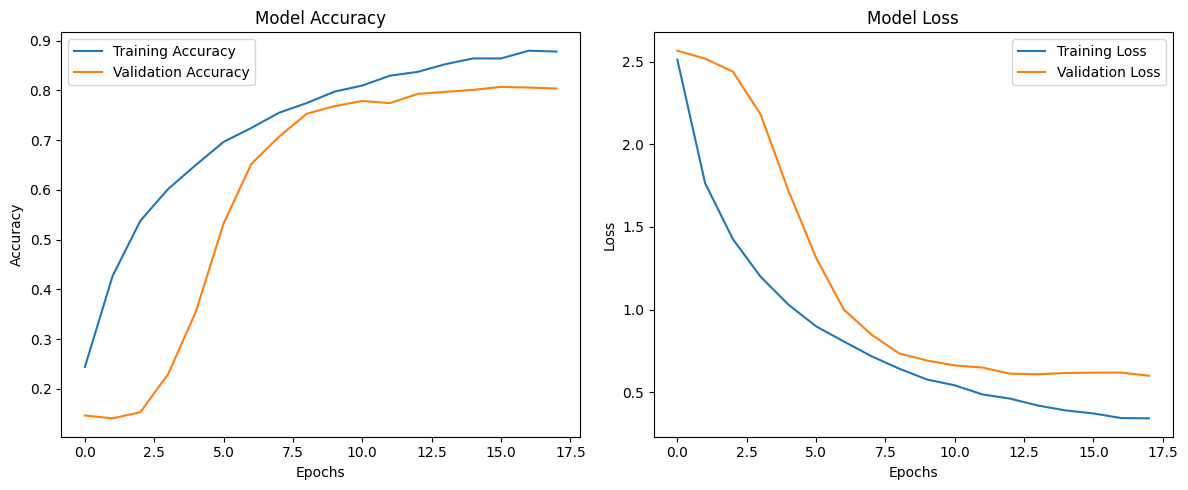

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
True Label: 7, Predicted Label: 7


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                          ┃ Output Shape                  ┃        Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ dense (Dense)                         │ (None, 512)                   │        401,920 │    Y    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ dropout (Dropout)                     │ (None, 512)                   │              0 │    -    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ batch_normalization                   │ (None, 512)                   │          2,048 │    Y    │
│ (BatchNormalization)                  │                               │                │         │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ dense_1 (Dense)                       │ (None, 256)                   │        131,328 │    Y    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ dropout_1 (Dropout)                   │ (None, 256)                   │              0 │    -    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ batch_normalization_1                 │ (None, 256)                   │          1,024 │    Y    │
│ (BatchNormalization)                  │                               │                │         │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ dense_2 (Dense)                       │ (None, 128)                   │         32,896 │    Y    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ batch_normalization_2                 │ (None, 128)                   │            512 │    Y    │
│ (BatchNormalization)                  │                               │                │         │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ dense_3 (Dense)                       │ (None, 15)                    │          1,935 │    Y    │
└───────────────────────────────────────┴───────────────────────────────┴────────────────┴─────────┘

 Total params: 1,711,407 (6.53 MB)

 Trainable params: 569,871 (2.17 MB)

 Non-trainable params: 1,792 (7.00 KB)

 Optimizer params: 1,139,744 (4.35 MB)

In [ ]:
# Clear previous variables and states
%reset -f

# Import necessary libraries
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2  # OpenCV for image processing
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Clear any previous TensorFlow models from memory
tf.keras.backend.clear_session()

# Dataset extraction and loading
if not os.path.exists('data/extracted_data/Chinese_Num_Mnist'):
    # Remove any existing files with the same name
    !rm -rf hand_sign_datasets_csv.7z
    # Download the dataset
    !wget "https://github.com/lesterchia1/chinese_num_MNIST/raw/main/chinese_num_mnist_datasets.7z"
    # Install p7zip if not already installed
    !apt-get install -y p7zip-full
    # Extract the dataset
    !7z x chinese_num_mnist_datasets.7z -odata/extracted_data
else:
    print("Directory 'chinese_num_mnist_datasets' already exists.")

# List the root directory to verify contents
%ls

# Uncomment these lines to reset and clean up datasets if needed
# %rm -rf chinese_num_mnist_datasets.7z
# %rm -rf data/
# %rm -rf sample_data/

# Define constants
IMAGE_SIZE = 28
NUM_CLASSES = 15
DATA_DIR = "data/extracted_data/Chinese_Num_Mnist/Dataset"

# Function to load and preprocess images
def load_and_preprocess_images(data_dir, image_size=28):
    images, labels = [], []

    # Iterate through files in the dataset directory
    for idx, file in enumerate(sorted(os.listdir(data_dir))):
        if file.endswith('.jpg'):
            img_path = os.path.join(data_dir, file)
            try:
                # Load image, resize, and normalize
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (image_size, image_size))
                images.append(img)
                labels.append(idx % NUM_CLASSES)  # Assign labels based on file order
            except Exception as e:
                print(f"Error processing {img_path}: {e}")

    # Convert to NumPy arrays and normalize
    return np.array(images, dtype="float32") / 255.0, np.array(labels)

# Load dataset
print("Loading dataset...")
X, y = load_and_preprocess_images(DATA_DIR)

# Ensure the dataset is not empty
if X.shape[0] == 0:
    raise ValueError("Dataset is empty.")

# Reshape the images and one-hot encode labels
X = X.reshape(X.shape[0], -1)
y = to_categorical(y, NUM_CLASSES)

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the model
model = Sequential([
    layers.Dense(512, activation="relu", input_shape=(IMAGE_SIZE * IMAGE_SIZE,)),
    layers.Dropout(0.4),
    layers.BatchNormalization(),

    layers.Dense(256, activation="relu"),
    layers.Dropout(0.4),
    layers.BatchNormalization(),

    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),

    layers.Dense(NUM_CLASSES, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=18,
                    batch_size=120,
                    callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Plot training history
plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Print an example prediction
print(f"True Label: {true_classes[0]}, Predicted Label: {predicted_classes[0]}")

# Summarize the model
model.summary(line_length=100, expand_nested=True, show_trainable=True)
